In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

# Load the Data

In [2]:
batters = pd.read_csv('../data/cleaned/bat_model_train.csv')
relievers = pd.read_csv('../data/cleaned/relief_model_train.csv')
starters = pd.read_csv('../data/cleaned/starter_model_train.csv')

## View Common Columns

In [3]:
common_cols = batters.columns.intersection(relievers.columns)
print(common_cols)

Index(['Unnamed: 0', 'Season', 'Name', 'Team', 'G', 'SO', 'BB%+', 'K%+', 'WPA',
       'WPA/LI', 'Clutch', 'WAR', 'MLBAMID', 'decade', 'league', 'award_id',
       'K%+_rank', 'BB%+_rank', 'WAR_rank', 'WPA_rank', 'WPA/LI_rank',
       'Clutch_rank', 'mean_rookie_rank', 'rookie_rank', 'pos',
       'mean_mlb_rank', 'mlb_rank', 'key_bbref', 'awardID', 'lgID',
       'pointsWon', 'pointsMax', 'votesFirst', 'unanimous', 'vote_share',
       'vote_getter', 'rookie_of_the_year', '_merge'],
      dtype='object')


In [4]:
cols = ['Name', 'Team', 'Season', 'league', 'pos',
        'vote_getter', 'rookie_of_the_year', 'WAR',
        'WPA', 'Clutch', 'vote_share']

df = pd.concat([ batters[cols], relievers[cols], starters[cols] ])
df = df.reset_index()

print(df)

      index              Name Team  Season league      pos  vote_getter  \
0         0        Tim Raines  WSN    1981     NL       2B            1   
1         1       Alvin Davis  SEA    1984     AL       1B            1   
2         2     Butch Wynegar  MIN    1976     AL        C            1   
3         3        Mike Trout  LAA    2012     AL       CF            1   
4         4     Jason Heyward  ATL    2010     NL       RF            1   
...     ...               ...  ...     ...    ...      ...          ...   
1912    457     Nick Martinez  TEX    2014     AL  starter            0   
1913    458       Colby Lewis  TEX    2003     AL  starter            0   
1914    459  Michael Lorenzen  CIN    2015     NL  starter            0   
1915    460  Jonathan Heasley  KCR    2022     AL  starter            0   
1916    461         Wil Crowe  PIT    2021     NL  starter            0   

      rookie_of_the_year   WAR   WPA  Clutch  vote_share  
0                   0.00  3.71  3.25    

## Breakdown of Positions in the Data

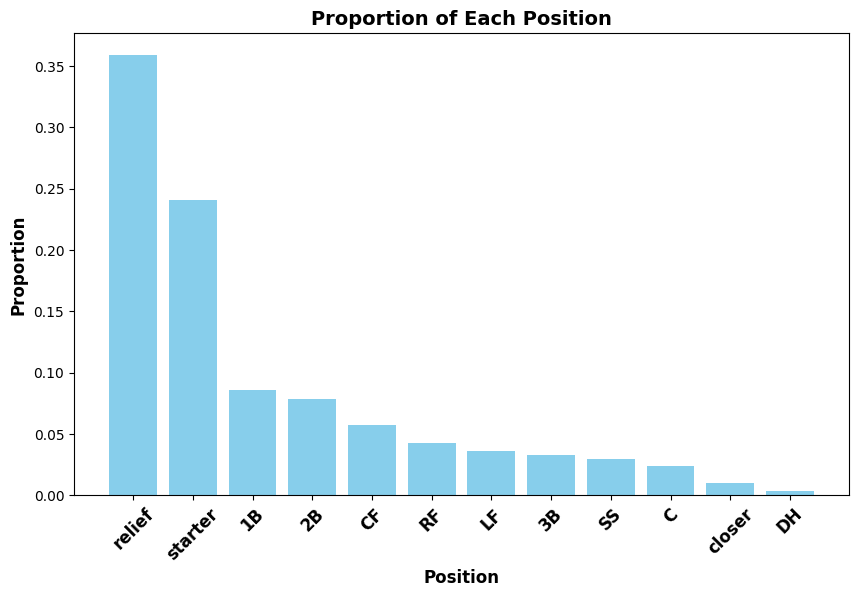

In [5]:
# Calculate the proportion of each 'pos'
proportion_df = df['pos'].value_counts(normalize=True).reset_index()

# Rename the columns for clarity
proportion_df.columns = ['pos', 'proportion']

# Sort the proportions from highest to lowest
proportion_df = proportion_df.sort_values(by='proportion', ascending=False)

# Create a barplot for the proportions
plt.figure(figsize=(10, 6))
plt.bar(proportion_df['pos'], proportion_df['proportion'], color='skyblue')
plt.title('Proportion of Each Position', fontsize=14, weight='bold')
plt.xlabel('Position', fontsize=12, weight='bold')
plt.ylabel('Proportion', fontsize=12, weight='bold')
plt.xticks(rotation=45)

plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('pos_prop_barplot.png', dpi=300, bbox_inches='tight')

plt.show()

## Probability of Winning Rookie of the Year (by Position)

### Table of Probabilities

In [6]:
# Group by 'pos' and calculate the probability of rookie_of_the_year being 1
probabilities_roy = df.groupby('pos')['rookie_of_the_year'].mean().reset_index()

# Rename the column for clarity
probabilities_roy.rename(columns={'rookie_of_the_year': 'probability_of_roty'}, inplace=True)

probabilities_roy = probabilities_roy.sort_values(by='probability_of_roty', ascending=False)

# Display the resulting probabilities
print(probabilities_roy)

        pos  probability_of_roty
5        DH                 0.43
9    closer                 0.26
8        SS                 0.19
6        LF                 0.14
2        3B                 0.14
0        1B                 0.09
4        CF                 0.08
7        RF                 0.07
3         C                 0.07
1        2B                 0.05
11  starter                 0.03
10   relief                 0.01


In [7]:
df.groupby('pos')['rookie_of_the_year'].sum()

pos
1B        14.00
2B         7.00
3B         9.00
C          3.00
CF         9.00
DH         3.00
LF        10.00
RF         6.00
SS        11.00
closer     5.00
relief     5.00
starter   16.00
Name: rookie_of_the_year, dtype: float64

### Barplot of Probabilities

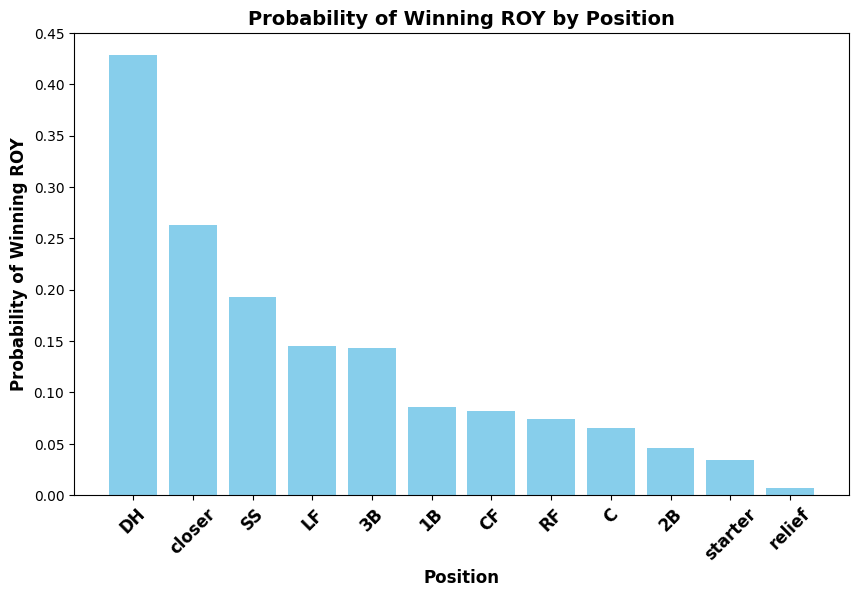

In [8]:
# Bar plot of sorted probabilities by position
plt.figure(figsize=(10, 6))
plt.bar(probabilities_roy['pos'], probabilities_roy['probability_of_roty'], color='skyblue')
plt.xlabel('Position', fontsize=12, weight='bold')
plt.ylabel('Probability of Winning ROY', fontsize=12, weight='bold')
plt.title('Probability of Winning ROY by Position', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('pos_prop_roy.png', dpi=300, bbox_inches='tight')

plt.show()

## Probability of Receiving a Rookie of the Year Vote (by Position)

### Table of Probabilities

In [9]:
# Group by 'pos' and calculate the probability of rookie_of_the_year being 1
probabilities_vg = df.groupby('pos')['vote_getter'].mean().reset_index()

# Rename the column for clarity
probabilities_vg.rename(columns={'vote_getter': 'probability_of_vote'}, inplace=True)

probabilities_vg = probabilities_vg.sort_values(by='probability_of_vote', ascending=False)

# Display the resulting probabilities
print(probabilities_vg)

        pos  probability_of_vote
5        DH                 0.86
9    closer                 0.68
2        3B                 0.65
8        SS                 0.58
0        1B                 0.57
7        RF                 0.56
6        LF                 0.55
4        CF                 0.54
1        2B                 0.43
11  starter                 0.37
3         C                 0.37
10   relief                 0.09


### Barplot of Probabilities

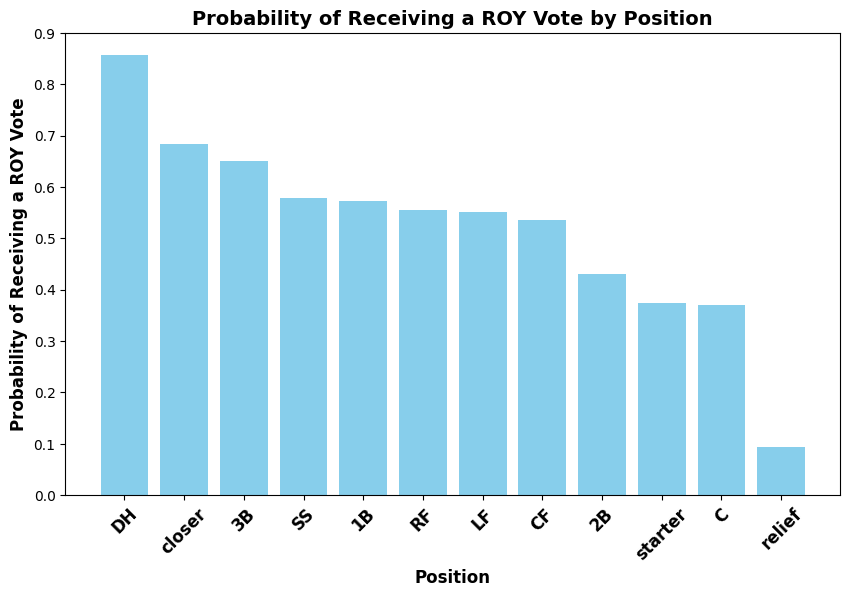

In [10]:
# Bar plot of sorted probabilities by position
plt.figure(figsize=(10, 6))
plt.bar(probabilities_vg['pos'], probabilities_vg['probability_of_vote'], color='skyblue')
plt.xlabel('Position', fontsize=12, weight='bold')
plt.ylabel('Probability of Receiving a ROY Vote', fontsize=12, weight='bold')
plt.title('Probability of Receiving a ROY Vote by Position', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('pos_prop_vg.png', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
batters_24 = pd.read_csv('../data/cleaned/bat_24_model_train.csv')
relievers_24 = pd.read_csv('../data/cleaned/relief_24_model_train.csv')
starters_24 = pd.read_csv('../data/cleaned/starter_24_model_train.csv')

stathead_war = pd.read_csv('../data/stathead/stathead_rookie_war.csv')
stathead_span = pd.read_csv('../data/stathead/stathead_rookie_pitchers.csv')

In [12]:
# 1. Bind rows from starters and starters_24, then rename 'WAR' to 'fWAR'
starters_df = pd.concat([starters, starters_24]).rename(columns={'WAR': 'fWAR'}).sort_values(by='fWAR', ascending=False)

# 2. Create a new column 'WAR_per_IP', and rename columns in stathead_war
stathead_war['WAR_per_IP'] = stathead_war['WAR'] / stathead_war['IP']
stathead_war = stathead_war.rename(columns={
    'Player-additional': 'key_bbref',  # Rename 'Player-additional' to 'key_bbref'
    'WAR': 'bWAR'                      # Rename 'WAR' to 'bWAR'
})

# 3. Perform a left join of starters_df and selected columns from stathead_war
comb_start_df = pd.merge(starters_df, 
                         stathead_war[['Player', 'Season', 'bWAR', 'key_bbref']], 
                         how='left', 
                         on=['Season', 'key_bbref'])

# 4. Create the 'avg_WAR' column and sort by 'avg_WAR' in descending order
comb_start_df['avg_WAR'] = (comb_start_df['fWAR'] + comb_start_df['bWAR']) / 2
comb_start_df = comb_start_df.sort_values(by='avg_WAR', ascending=False)

In [13]:
# View the result
print(comb_start_df[['Name', 'Season', 'league', 'fWAR', 'bWAR', 'avg_WAR']].head(15))

                   Name  Season league  fWAR  bWAR  avg_WAR
6          Mark Fidrych    1976     AL  4.58  9.60     7.09
0         Dwight Gooden    1984     NL  8.26  5.50     6.88
1       John Montefusco    1975     NL  5.96  6.80     6.38
7           Britt Burns    1980     AL  4.50  7.00     5.75
10         Brandon Webb    2003     NL  4.31  6.10     5.20
14       José Fernández    2013     NL  4.16  6.20     5.18
17       Michael Soroka    2019     NL  4.01  6.10     5.06
2            Hideo Nomo    1995     NL  5.19  4.70     4.94
3   Fernando Valenzuela    1981     NL  4.88  4.80     4.84
9          Dave Fleming    1992     AL  4.37  5.10     4.73
21        Freddy Garcia    1999     AL  3.83  5.40     4.62
55          Dave Rozema    1977     AL  3.25  5.70     4.47
31          Paul Skenes    2024     NL  3.59  5.20     4.39
42         Kevin Appier    1990     AL  3.41  5.30     4.35
18           Roy Oswalt    2001     NL  3.97  4.70     4.33


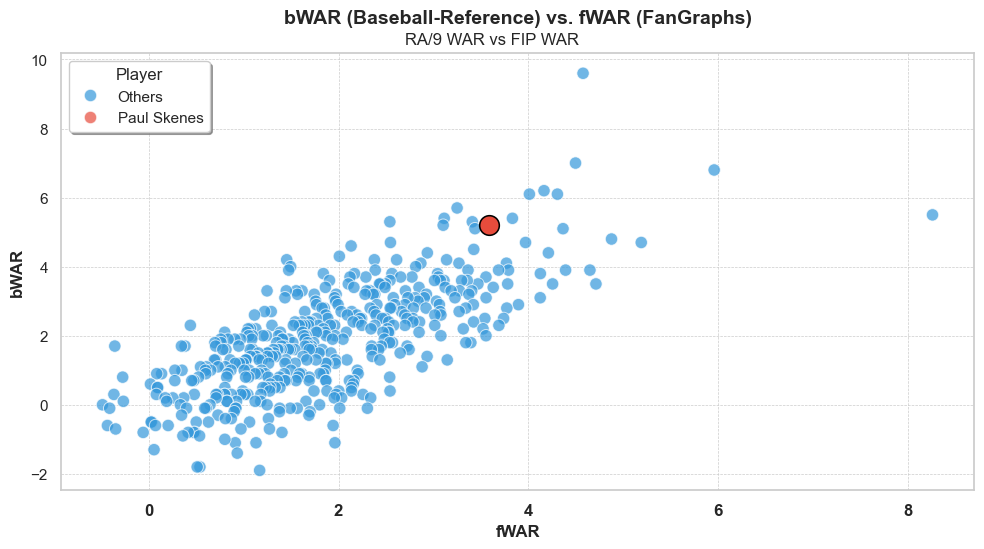

In [14]:
# Filter out rows with missing bWAR values
comb_start_df = comb_start_df.dropna(subset=['bWAR'])

# Create a new column to identify 'Paul Skenes'
comb_start_df['Player_Label'] = comb_start_df['Name'].apply(lambda x: 'Paul Skenes' if x == 'Paul Skenes' else 'Others')

# Set up the plot style
sns.set(style="whitegrid")

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot all points with different colors based on 'Player_Label'
sns.scatterplot(data=comb_start_df, x='fWAR', y='bWAR', hue='Player_Label', 
                palette={'Paul Skenes': '#E74C3C', 'Others': '#3498DB'}, s=80, alpha=0.7)

# Highlight 'Paul Skenes' with a larger point
sns.scatterplot(data=comb_start_df[comb_start_df['Name'] == 'Paul Skenes'], 
                x='fWAR', y='bWAR', color='#E74C3C', s=200, edgecolor='black')

# Add title and subtitle with refined layout
plt.title("bWAR (Baseball-Reference) vs. fWAR (FanGraphs)", fontsize=14, weight='bold', 
          y=1.05)
plt.suptitle("RA/9 WAR vs FIP WAR", fontsize=12, y=0.875)

# Customize axis labels with enhanced styling
plt.xlabel("fWAR", fontsize=12, weight='bold')
plt.ylabel("bWAR", fontsize=12, weight='bold')

# Customize legend
plt.legend(title='Player', title_fontsize=12, fontsize=11, loc='upper left', frameon=True, fancybox=True, shadow=True)

# Add gridlines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.setp(plt.gca().get_xticklabels(), fontsize=12, fontweight='bold')

plt.savefig('bWAR_vs_fWAR.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
cols = ['Name', 'Season', 'league', 'WAR']
batters_df = pd.concat([ batters[cols], batters_24[cols] ])

grouped_df = batters_df.groupby('Season')['WAR'].mean().reset_index().sort_values('WAR', ascending=False)
print(grouped_df.head(10))

    Season  WAR
13    1987 2.93
10    1984 2.87
18    1992 2.76
8     1982 2.25
0     1974 2.24
48    2024 2.19
27    2002 2.19
4     1978 2.11
14    1988 1.96
41    2016 1.95


In [16]:
starters_df = pd.concat([ starters[cols], starters_24[cols] ])

grouped_df = starters_df.groupby('Season')['WAR'].mean().reset_index().sort_values('WAR', ascending=False)
print(grouped_df.head(10))

    Season  WAR
10    1984 2.86
37    2012 2.85
7     1981 2.61
9     1983 2.57
1     1975 2.52
16    1990 2.43
15    1989 2.33
41    2016 2.31
19    1993 2.27
18    1992 2.23


In [17]:
relievers_df = pd.concat([ relievers[cols], relievers_24[cols] ])

grouped_df = relievers_df.groupby('Season')['WAR'].mean().reset_index().sort_values('WAR', ascending=False)
print(grouped_df.head(10))

    Season  WAR
6     1980 1.12
41    2016 1.06
15    1989 0.96
31    2006 0.95
11    1985 0.94
12    1986 0.85
5     1979 0.76
14    1988 0.71
13    1987 0.69
39    2014 0.68
